In [34]:
import os
import pandas as pd
import numpy as np

# Using Skicit-learn to split data into training and testing sets 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix



In [2]:
train_fp = os.path.join(os.getcwd(),'aux_data','trainset.csv')
features_df = pd.read_csv(train_fp)
features_df.head(4)

,Unnamed: 0,geometry,x,y,r,g,b,nifr,iceplant
0,0,POINT (238534.77144037225 3810764.4391108337),238534.771440,3.810764e+06,89,84,89,144,1
1,1,POINT (238516.67475820333 3810768.371394962),238516.674758,3.810768e+06,100,88,93,148,1
2,2,POINT (238496.0413784355 3810771.828721741),238496.041378,3.810772e+06,97,93,96,140,1
3,3,POINT (238497.93042821612 3810771.2369597284),238497.930428,3.810771e+06,87,80,86,137,1


In [3]:
features_df.drop(['geometry','Unnamed: 0','x','y'],axis=1,inplace=True)

In [4]:
# Descriptive statistics for each column 
features_df.describe()

,r,g,b,nifr,iceplant
count,224.000000,224.000000,224.000000,224.000000,224.000000
mean,84.093750,91.187500,88.955357,146.495536,0.330357
std,32.576714,28.561485,21.804014,36.055015,0.471395
min,29.000000,42.000000,59.000000,40.000000,0.000000
25%,64.000000,76.000000,75.000000,126.000000,0.000000
50%,81.000000,81.500000,83.500000,148.000000,0.000000
75%,91.250000,100.000000,96.000000,170.000000,1.000000
max,196.000000,192.000000,180.000000,213.000000,1.000000


In [26]:
# Labels are the values we want to predict
labels = np.array(features_df['iceplant'])

# Remove the labels from the features
features= features_df.drop('iceplant', axis = 1)
features_names = list(features.columns)

#Convert to numpy array
features = np.array(features)

In [27]:
features_names

['r', 'g', 'b', 'nifr']

In [6]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, 
                                                                            labels, 
                                                                            test_size = 0.3, 
                                                                            random_state = 42)

In [7]:
print('Training Features Shape:', train_features.shape) 
print('Training Labels Shape:', train_labels.shape) 
print('Testing Features Shape:', test_features.shape) 
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (156, 4)
Training Labels Shape: (156,)
Testing Features Shape: (68, 4)
Testing Labels Shape: (68,)


In [9]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 100, 
                           random_state = 42)
# Train the model on training data 
rf.fit(train_features, train_labels) 

RandomForestRegressor(random_state=42)

In [10]:
# Use the forest's predict method on the test data 
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.09


In [11]:
# Calculate mean absolute percentage error (MAPE) 
mape = 100 * ( (errors) / (test_labels))
# Calculate and display accuracy
accuracy = 100 - np.mean(mape) 
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: nan %.


/tmp/ipykernel_530/1025273937.py:2: RuntimeWarning: divide by zero encountered in true_divide
  mape = 100 * ( (errors) / (test_labels))
/tmp/ipykernel_530/1025273937.py:2: RuntimeWarning: invalid value encountered in true_divide
  mape = 100 * ( (errors) / (test_labels))


In [12]:
predictions

array([1.  , 0.  , 0.34, 1.  , 0.91, 0.05, 0.  , 0.  , 0.  , 0.68, 0.02,
       1.  , 0.01, 0.06, 0.  , 0.  , 0.  , 0.  , 0.33, 0.01, 0.06, 1.  ,
       0.  , 1.  , 1.  , 0.96, 0.  , 0.  , 0.  , 0.81, 0.95, 0.  , 1.  ,
       0.02, 0.95, 0.  , 0.5 , 0.03, 0.  , 0.21, 0.03, 1.  , 0.03, 0.47,
       0.91, 0.  , 0.01, 0.  , 0.  , 0.07, 0.  , 0.32, 0.56, 0.13, 0.05,
       1.  , 0.38, 0.  , 0.  , 0.95, 0.  , 0.99, 0.15, 1.  , 0.  , 0.99,
       1.  , 0.  ])

In [13]:
errors

array([0.  , 0.  , 0.34, 0.  , 0.09, 0.05, 0.  , 0.  , 0.  , 0.68, 0.02,
       0.  , 0.01, 0.06, 0.  , 0.  , 0.  , 0.  , 0.67, 0.01, 0.06, 0.  ,
       0.  , 0.  , 0.  , 0.04, 0.  , 0.  , 0.  , 0.81, 0.05, 0.  , 0.  ,
       0.02, 0.05, 0.  , 0.5 , 0.03, 0.  , 0.21, 0.03, 0.  , 0.03, 0.47,
       0.09, 0.  , 0.01, 0.  , 0.  , 0.07, 0.  , 0.68, 0.56, 0.13, 0.05,
       0.  , 0.38, 0.  , 0.  , 0.05, 0.  , 0.01, 0.15, 0.  , 0.  , 0.01,
       0.  , 0.  ])

In [31]:
test = pd.DataFrame(test_features, columns=features_names)
test['iceplant']=test_labels
test

,r,g,b,nifr,iceplant
0,82,77,82,144,1
1,142,129,130,145,0
2,71,93,75,164,0
3,82,80,82,151,1
4,84,81,88,133,1
...,...,...,...,...,...
63,75,74,72,167,1
64,31,47,59,113,0
65,86,77,77,161,1
66,78,72,79,144,1


In [52]:
thresh = 0.6
test['predictions']= predictions
test['classified_as'] = test.predictions.apply(lambda x : 1 if x>thresh else 0)
test

,r,g,b,nifr,iceplant,predictions,classified_as
0,82,77,82,144,1,1.00,1
1,142,129,130,145,0,0.00,0
2,71,93,75,164,0,0.34,0
3,82,80,82,151,1,1.00,1
4,84,81,88,133,1,0.91,1
...,...,...,...,...,...,...,...
63,75,74,72,167,1,1.00,1
64,31,47,59,113,0,0.00,0
65,86,77,77,161,1,0.99,1
66,78,72,79,144,1,1.00,1


In [53]:
N = test.shape[0]
results = confusion_matrix(test['iceplant'],test['classified_as'])

print('true negatives %', np.round(results[0,0]/N*100,2), 
      '    false positives %', np.round(results[0,1]/N*100,2))
print('false negatives %', np.round(results[1,0]/N*100,2), '    true positives %', np.round(results[1,1]/N*100,2))

true negatives % 64.71     false positives % 2.94
false negatives % 4.41     true positives % 27.94


In [69]:
import rasterio
import geopandas as gpd
import matplotlib.pyplot as plt

import pystac_client 
import planetary_computer as pc

from shapely.geometry import Polygon

In [61]:
# accesing Azure storage using pystac client
URL = "https://planetarycomputer.microsoft.com/api/stac/v1"
catalog = pystac_client.Client.open(URL)

# ********* HERE I KNOW WHICH IMAGE TEHSE POINTS ARE IN ******
itemid = 'ca_m_3411934_sw_11_060_20180722_20190209'
search = catalog.search(
    collections=["naip"],
    ids = itemid
)
item = list(search.get_items())[0]
# sign and open item
href = pc.sign(item.assets["image"].href)
ds = rasterio.open(href)
# we only need the image at this point to access the datasets crs

In [96]:
#  Campus Point + Campus + Goleta Beach
# reduce_box = Polygon([
#     [-119.8533036004,34.4025961754],
#     [-119.8322357862,34.4025961754],
#     [-119.8322357862,34.4198342586],
#     [-119.8533036004,34.4198342586],
#     [-119.8533036004,34.4025961754]])

reduce_box = Polygon([
    [-119.8534713523,34.4028697719],
    [-119.8409772016,34.4028697719],
    [-119.8409772016,34.4129840686],
    [-119.8534713523,34.4129840686],
    [-119.8534713523,34.4028697719]])


reduce = gpd.GeoDataFrame({'geometry':[reduce_box]}, crs="EPSG:4326")
reduce = reduce.to_crs(ds.crs)

win = ds.window(*reduce.total_bounds)
win

Window(col_off=3705.826973459043, row_off=4884.473012050614, width=1967.1958567166585, height=1923.8473962945864)

In [97]:
check = rasterio.open(href).read([1,2,3], window=win)

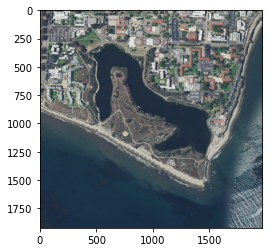

In [101]:
plt.imshow(np.moveaxis(check,0,-1))

In [103]:
check.shape

(3, 1923, 1967)

In [104]:
check

array([[[111, 114, 109, ..., 140, 128, 154],
        [108, 109, 109, ..., 140, 157, 170],
        [115, 104, 104, ..., 157, 168, 169],
        ...,
        [ 26,  27,  26, ..., 159, 171, 147],
        [ 26,  26,  24, ..., 138, 177, 165],
        [ 26,  26,  26, ..., 141, 150, 180]],

       [[107, 108, 104, ..., 143, 132, 152],
        [103, 106, 107, ..., 142, 154, 164],
        [110, 105, 103, ..., 155, 165, 160],
        ...,
        [ 47,  47,  46, ..., 173, 182, 153],
        [ 45,  48,  46, ..., 156, 184, 167],
        [ 46,  46,  46, ..., 149, 164, 175]],

       [[109, 110, 110, ..., 145, 131, 146],
        [109, 107, 109, ..., 137, 147, 151],
        [113, 109, 107, ..., 147, 152, 146],
        ...,
        [ 68,  69,  68, ..., 168, 185, 162],
        [ 71,  70,  70, ..., 153, 181, 174],
        [ 69,  69,  69, ..., 162, 162, 172]]], dtype=uint8)

In [105]:
#https://gis.stackexchange.com/questions/361318/create-pandas-dataframe-from-raster-image-one-row-per-pixel-with-bands-as-colu
pd.DataFrame(check.reshape([3,-1]).T)

,0,1,2
0,111,107,109
1,114,108,110
2,109,104,110
3,111,107,109
4,113,109,109
...,...,...,...
3782536,185,185,179
3782537,188,185,191
3782538,141,149,162
3782539,150,164,162


In [107]:
subset = rasterio.open(href).read([1,2,3,4], window=win)

(4, 1923, 1967)

In [108]:
subset.shape

(4, 1923, 1967)

In [113]:
pixels = subset.reshape([4,-1]).T
pixels

array([[111, 107, 109,  87],
       [114, 108, 110,  93],
       [109, 104, 110,  89],
       ...,
       [141, 149, 162,  96],
       [150, 164, 162, 107],
       [180, 175, 172,  95]], dtype=uint8)

In [115]:
predictions = rf.predict(pixels)


array([0., 0., 0., ..., 0., 0., 0.])

In [124]:
predictions.shape

In [126]:
repredictions = predictions.reshape([1923,-1])
print(repredictions.shape)
repredictions

(1923, 1967)


array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.03],
       [0.  , 0.  , 0.  , ..., 0.  , 0.03, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]])

In [116]:
np.unique(predictions)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [121]:
image_classification = pd.DataFrame(pixels,columns=['r','g','b','nir'])
image_classification['prediction'] = predictions
thresh = 0.6
image_classification['classified_as'] = test.predictions.apply(lambda x : 1 if x>thresh else 0)
image_classification

,r,g,b,nir,predictions,classified_as
0,111,107,109,87,0.0,1.0
1,114,108,110,93,0.0,0.0
2,109,104,110,89,0.0,0.0
3,111,107,109,90,0.0,1.0
4,113,109,109,93,0.0,1.0
...,...,...,...,...,...,...
3782536,185,185,179,145,0.0,NaN
3782537,188,185,191,118,0.0,NaN
3782538,141,149,162,96,0.0,NaN
3782539,150,164,162,107,0.0,NaN


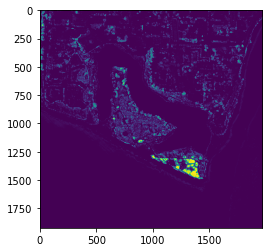

In [127]:
plt.imshow(repredictions)